In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
from joblib import load, dump
from collections import Counter

In [3]:
def load_json(json_path):

    with open(json_path, "r") as fd:
        return json.load(fd)

def get_label_feature_dict(proba):

    to_label = {
        0: "Class Weight",
        1: "Class's Hits Rate",
        2: "Confidence",
        3: "Divergence",
        4: "Agreement Size",
        5: "Scaled Agreement Size"
    }

    start = len(to_label)
    end = start + proba.shape[1]
    for c, i in enumerate(np.arange(start, end)):
        to_label[i] = f"Probability Class {c}"

    start = len(to_label)
    end = start + proba.shape[1]
    for c, i in enumerate(np.arange(start, end)):
        to_label[i] = f"Centroid L2 {c}"

    start = len(to_label)
    end = start + proba.shape[1]
    for c, i in enumerate(np.arange(start, end)):
        to_label[i] = f"Centroid Cosine {c}"

    start = len(to_label)
    end = start + proba.shape[1] * 20
    for c, i in enumerate(np.arange(start, end)):
        to_label[i] = f"KNN l2 {c}"

    start = len(to_label)
    end = start + proba.shape[1] * 20
    for c, i in enumerate(np.arange(start, end)):
        to_label[i] = f"KNN Cosine {c}"

    return to_label

def plot_feature_ranking(feat_freq, n_feats = 25):

    feat_list = [ [feat_name, feat_freq[feat_name]] for feat_name in feat_freq ]
    feat_list.sort(key=lambda x: x[1], reverse=True)
    x = np.arange(n_feats)
    y = [ t[1] for t in feat_list ][:n_feats]
    labels = [ t[0] for t in feat_list ][:n_feats]

    plt.bar(x, y)
    _ = plt.xticks(ticks=x, labels=labels, rotation=90)

    plt.xlabel("Features")
    plt.ylabel("Feature Importance (Acumulado)")

In [4]:
CLFS = ["kpr", "ktr", "lpr", "ltr", "sfr", "stmk", "xfr", "xpr", "xtr", "kfr",
        "ktmk", "lfr", "ltmk", "spr", "str", "xlnet_softmax", "xtmk", "rep_bert"]


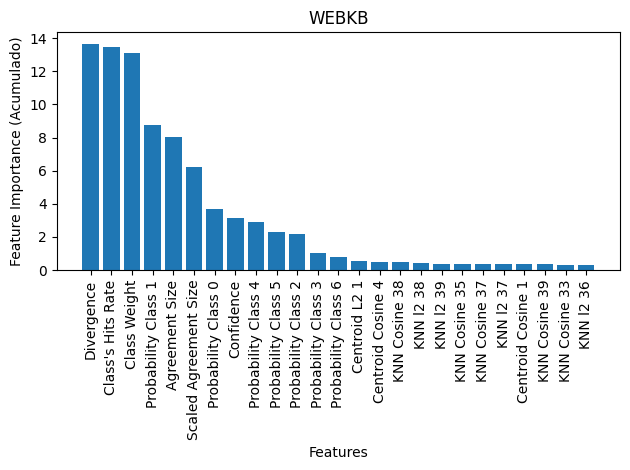

In [5]:
proba = np.load("/home/welton/data/clfs_output/split_10/webkb/10_folds/xtmk/0/train.npz")["X_train"]
to_label = get_label_feature_dict(proba)

feat_freq = {}
for clf in CLFS:
    for fold in np.arange(10):
        forest = load(f"/home/welton/data/oracle/local_gbm_75/webkb/{clf}/{fold}/forest")
        fimp = forest.feature_importances_
        ranking = (1 - fimp).argsort()
        j = load_json(f"/home/welton/data/oracle/local_gbm_75/webkb/{clf}/{fold}/fs.json")
        topf = ranking[:j["best_feats"]]
        for fid in topf:
            feat_name = to_label[fid]
            if feat_name not in feat_freq:
                feat_freq[feat_name] = 0
            feat_freq[feat_name] += fimp[fid]

plot_feature_ranking(feat_freq)
plt.title("WEBKB")
plt.tight_layout()

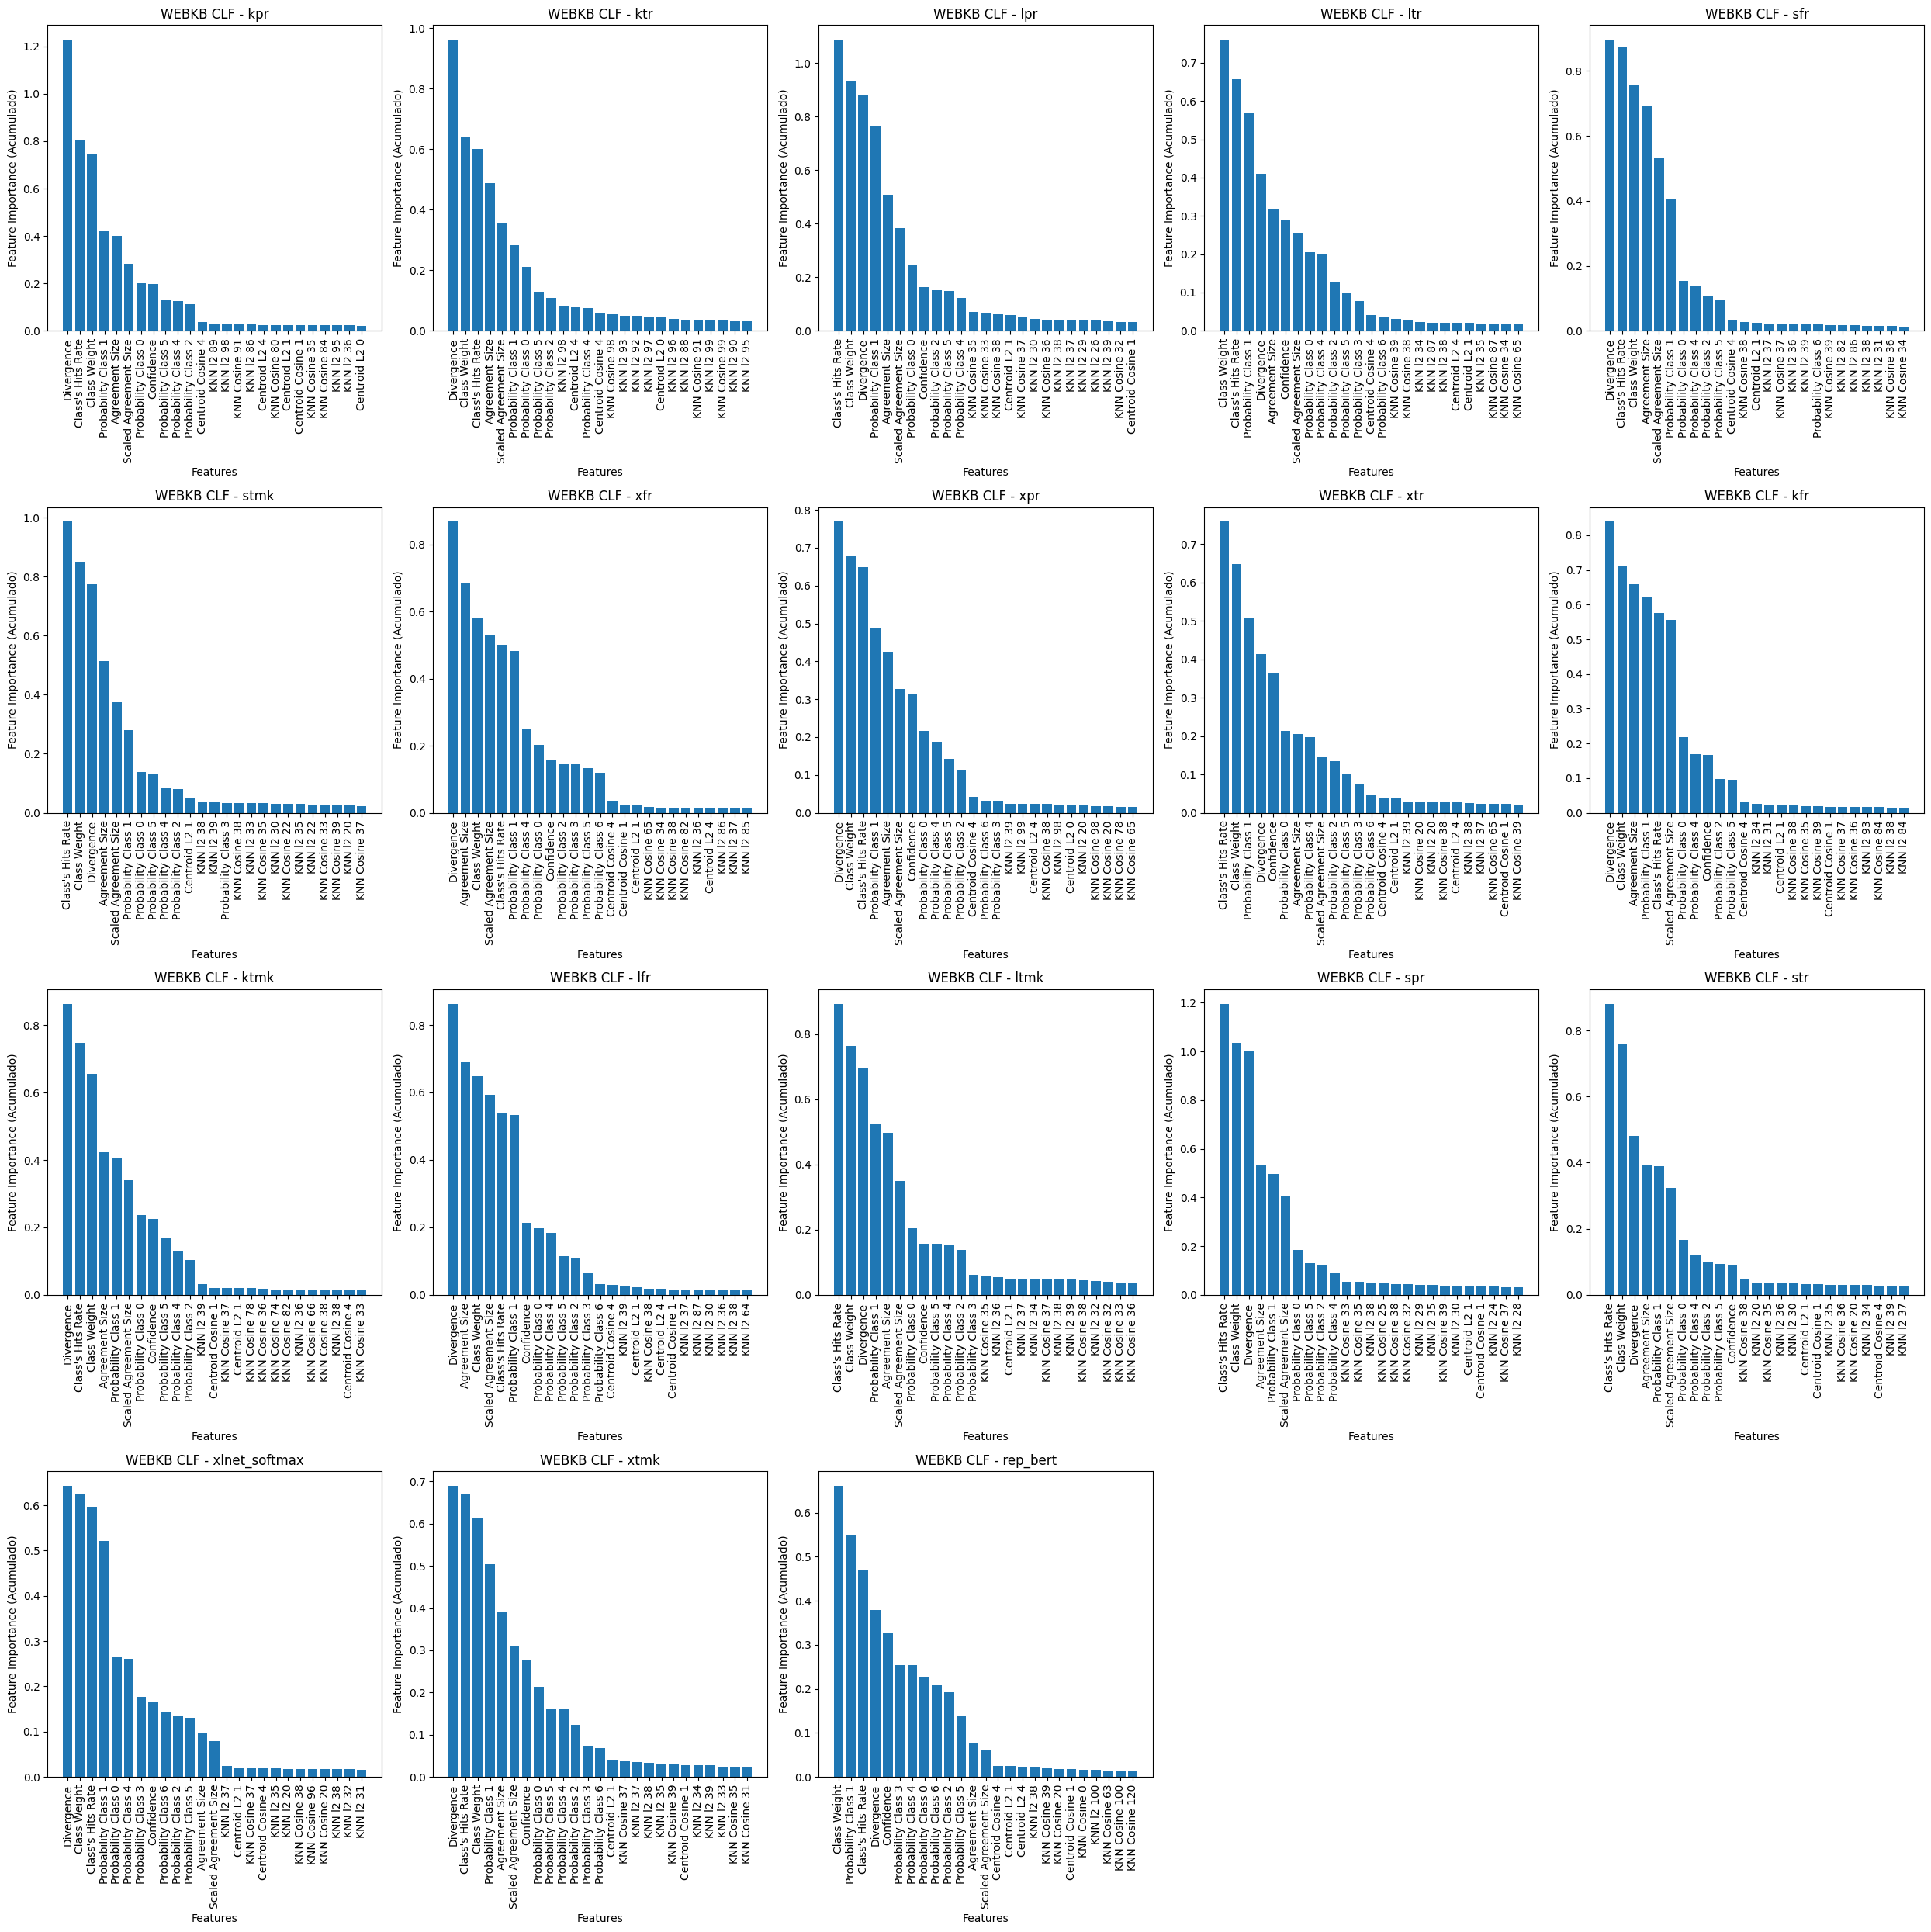

In [6]:
proba = np.load("/home/welton/data/clfs_output/split_10/webkb/10_folds/xtmk/0/train.npz")["X_train"]
to_label = get_label_feature_dict(proba)

plt.figure(figsize=(25, 25))
for idx_clf, clf in enumerate(CLFS):
    feat_freq = {}
    for fold in np.arange(10):
        forest = load(f"/home/welton/data/oracle/local_gbm_75/webkb/{clf}/{fold}/forest")
        fimp = forest.feature_importances_
        ranking = (1 - fimp).argsort()
        j = load_json(f"/home/welton/data/oracle/local_gbm_75/webkb/{clf}/{fold}/fs.json")
        topf = ranking[:j["best_feats"]]
        for fid in topf:
            feat_name = to_label[fid]
            if feat_name not in feat_freq:
                feat_freq[feat_name] = 0
            feat_freq[feat_name] += fimp[fid]
    plt.subplot(4, 5, idx_clf + 1)
    plot_feature_ranking(feat_freq)
    plt.title(f"WEBKB CLF - {clf}")
plt.tight_layout()

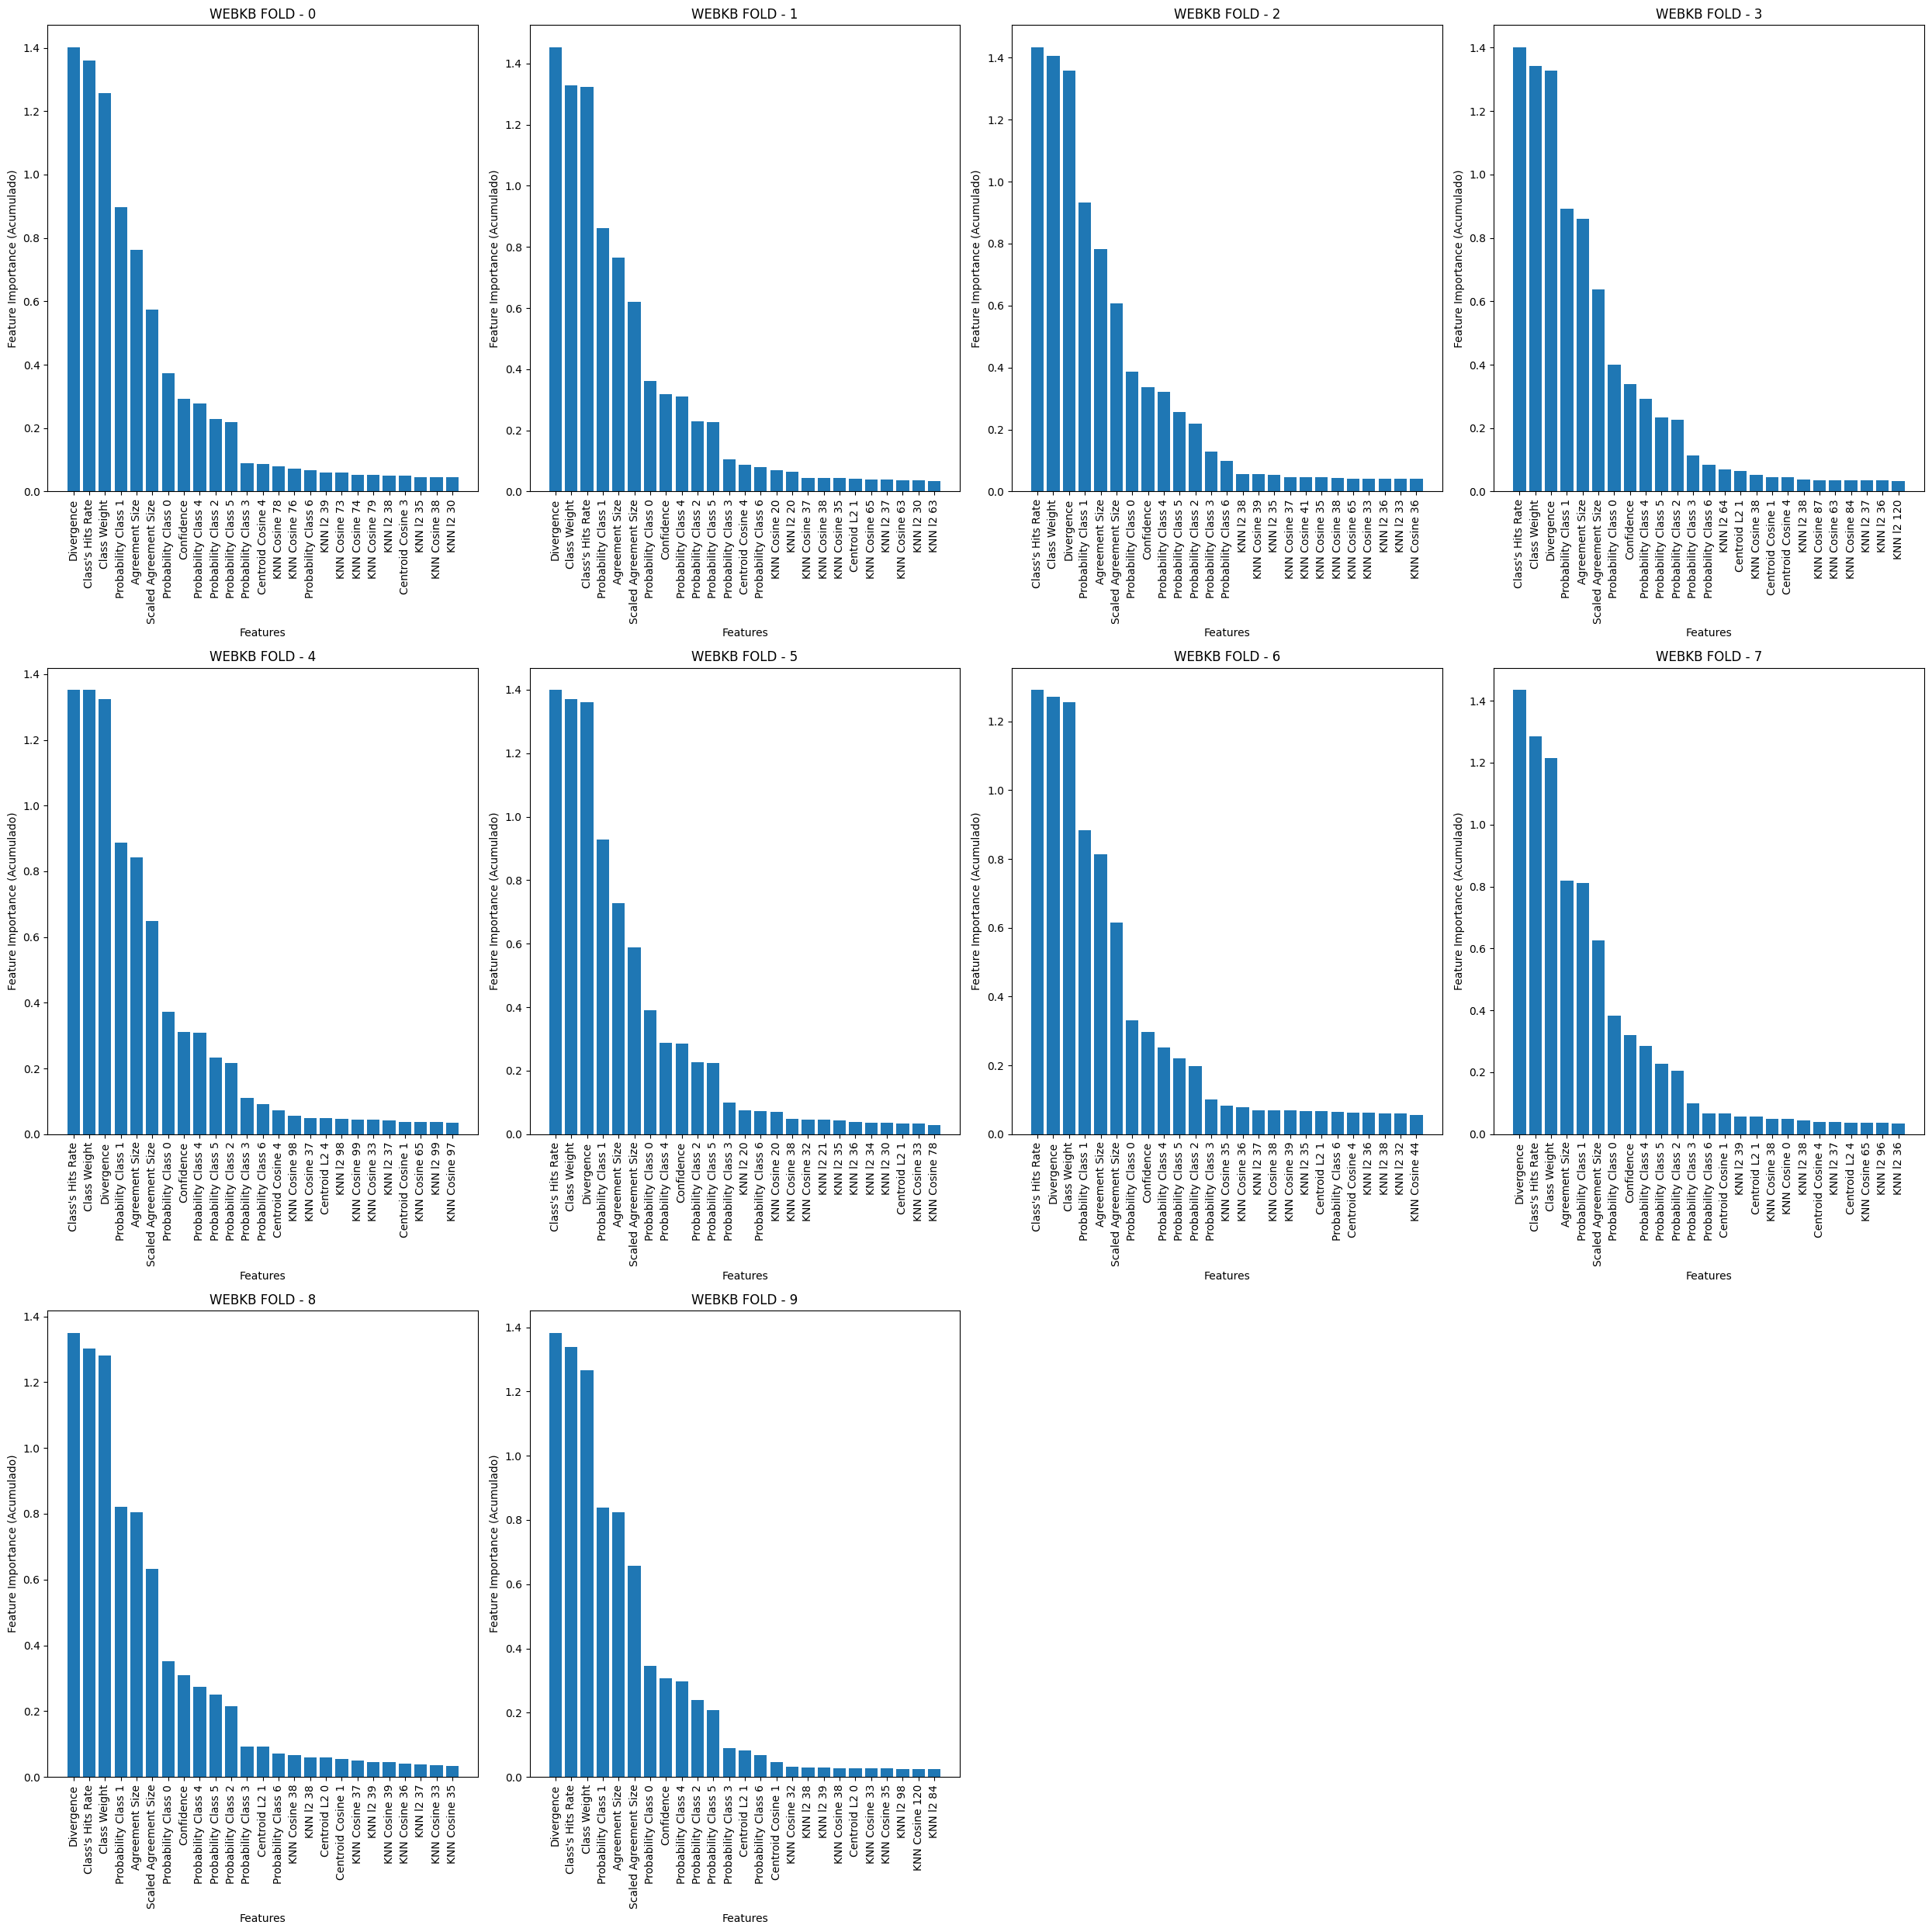

In [7]:
proba = np.load("/home/welton/data/clfs_output/split_10/webkb/10_folds/xtmk/0/train.npz")["X_train"]
to_label = get_label_feature_dict(proba)

plt.figure(figsize=(25, 25))
for fold in np.arange(10):
    feat_freq = {}
    for clf in CLFS:
        forest = load(f"/home/welton/data/oracle/local_gbm_75/webkb/{clf}/{fold}/forest")
        fimp = forest.feature_importances_
        ranking = (1 - fimp).argsort()
        j = load_json(f"/home/welton/data/oracle/local_gbm_75/webkb/{clf}/{fold}/fs.json")
        topf = ranking[:j["best_feats"]]
        for fid in topf:
            feat_name = to_label[fid]
            if feat_name not in feat_freq:
                feat_freq[feat_name] = 0
            feat_freq[feat_name] += fimp[fid]
    plt.subplot(3, 4, fold + 1)
    plot_feature_ranking(feat_freq)
    plt.title(f"WEBKB FOLD - {fold}")
plt.tight_layout()